# Introduction to Pandas

## Basic Imports

In [1]:
import numpy as np
import pandas as pd
import math
# Stop pandas from abbreviating tables to fit in the notebook
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
# Display graphs in the notebook
%matplotlib inline

## Pandas DataFrames

### Creating a dataframe

Now, lets make a data frame with first making a list for each variable.

In [ ]:
cities=["Delhi","Mumbai","Kolkata","Chennai"]
code = [11,22,33,44]

mydata=list(zip(cities,code))

zip combines corresponding elements of an iterable into 
tuples

In [ ]:
mydata

now lets convert this to a pandas data frame which comes with lot of useful and intuitive properties which makes our job easy when working with dataframes in general. If you have worked with R before, then you'd notice that pandas dataframes works very similar to R's data frames.

In [ ]:
pd.DataFrame

In [ ]:
df = pd.DataFrame(data=mydata,columns=["cities","codes"])
df

In [ ]:
type(df)

In [ ]:
df = pd.DataFrame({"cities":cities,"code":code})
df

to write a data frame to csv file , you can use function to_csv. In the function you need to set option index=False in order to avoid writing rownumbers to csv file and header=True , in order to write variables names in the first row of the csv file.

if you simply provide the file name, it will be written to where your .ipynb/.py file is. In case you want to write the file to a specific location then you'd need to mention the file name with complete path.

### Writing dataframe to file

In [ ]:
df.to_csv("data/mydata2.csv",index=False,header=False)
#df.to_csv("data/mydata.csv")

You can use function ExcelWriter to creater a writer object for an excel file. and then use function to_excel with data frame to write data to excel file. Here is an example

In [ ]:
#!pip install openpyxl

In [ ]:
writer=pd.ExcelWriter("data/mydata.xlsx")

df.to_excel(writer,"Sheet1",index=False)
df.to_excel(writer,"Sheet2")

### Reading dataframe from file

In [ ]:
!cat "./data/loans data.csv"

To read from a csv file, we'll be using function read_csv. we can create a separate string first with complete path name and then use it in the function or anywhere else.

In [2]:
file='data/loans data.csv'
ld=pd.read_csv(file)

using function `head` you can lok at first few observations in the data which gives an idea about whether data was imported properly to python or not.

In [ ]:
ld.sample(10) #ld.head(10) #ld.tail(10)

### Dataframe attributes

- df.columns
- df.shape
- df.dtypes
- df.describe()
- df.info()

to get column names we can look attribute column of the data

In [ ]:
len(ld.columns)

In [3]:
ld.columns

Index(['ID', 'Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

to see type of these columns we can use attribute dtypes

In [4]:
ld.dtypes

ID                                float64
Amount.Requested                   object
Amount.Funded.By.Investors         object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

flost64 here correponds to numeric values and object corresponds to categorical columns

to know how many rows and columns are their in the data we can use attribute shape

In [ ]:
ld.shape

this tells us that the data has 2500 rows/observations and 15 columns in it

In [5]:
ld.describe()

,ID,Monthly.Income,Inquiries.in.the.Last.6.Months
count,2499.000000,2497.000000,2497.000000
mean,51643.325330,5689.716608,0.906688
std,30053.637661,3963.568002,1.231149
min,10.000000,588.500000,0.000000
25%,26570.500000,3500.000000,0.000000
50%,50673.000000,5000.000000,0.000000
75%,77583.000000,6800.000000,1.000000
max,104202.000000,102750.000000,9.000000


### Indexing/ Subsetting

 - iloc
 - loc <br>
 
`loc` gets rows (or columns) with particular labels from the index. <br>
`iloc` gets rows (or columns) at particular positions in the index (so it only takes integers).

now lets subset this data on the basis of row and column numbers , keep in mind that count start with 0 for both 

In [ ]:
ld1=ld.iloc[3:7,1:5]
ld1

iloc here correponds to subsetting by position , to understand this better lets try to further subset this data

In [ ]:
ld1.iloc[2:4,1:3]

as you can see here the position is relative to current data , not the original one

All rows and the following ordered columns as a list

In [ ]:
ld.loc[:,["Home.Ownership"]]

Generally however we do not subset data by positions , we subset by either conditions or column names , if we are subsetting just on the basis of conditions or just column names we can directly pass those in square brackets

In [ ]:
ld.head(2)

In [ ]:
ld["Home.Ownership"].unique()

In [ ]:
conditions = ((ld['Home.Ownership']=='MORTGAGE') | 
              (ld['Home.Ownership']=='RENT')) & (ld['Monthly.Income']>5000)

In [ ]:
ld[conditions].head(3)

In [ ]:
desired_cols = ['Home.Ownership','Monthly.Income']

In [ ]:
result = ld.loc[conditions,desired_cols]
result.shape

in order to negate a condition or drop rows on the basis of a conditon , we just need to add a ~ symbol in front of the condition 

In [ ]:
ld[~(condition)].shape

In [ ]:
1814+686

in order to drop columns on the basis of names we can make use of the inbuilt drop function

In [ ]:
len(ld.columns)

In [ ]:
ld.drop(['Home.Ownership','Monthly.Income'],axis=1, inplace=True)

In [ ]:
ld.shape

if you scroll through the output you will find that those columns are no more in the data, this however doesnt modify the original data , these columns are still present in the data

In [ ]:
len(ld.columns)

In [ ]:
len(c.columns)

In [ ]:
#ld=ld.drop(['Home.Ownership','Monthly.Income'],axis=1)

In [ ]:
len(ld.columns)

In [ ]:
ld.drop(['Debt.To.Income.Ratio', 'State'],axis=1,inplace=True)

In [ ]:
len(ld.columns)

this changes the data inplace 

In [ ]:
del ld['Employment.Length']

In [ ]:
ld.shape

## Numerical Analysis

### General Analysis

In [8]:
myfile='data/bank-full.csv'
#bd=pd.read_csv(myfile) #try this first. Should give non-desired output.
bd=pd.read_csv(myfile,sep=";")

In [10]:
bd.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
41325,65,retired,divorced,tertiary,no,0,no,no,cellular,28,aug,248,1,-1,0,unknown,no
5628,29,services,single,secondary,no,1008,yes,no,unknown,23,may,426,9,-1,0,unknown,no
40855,32,services,single,secondary,no,1153,no,no,cellular,12,aug,340,2,-1,0,unknown,no
5120,28,services,single,secondary,no,-427,yes,yes,unknown,21,may,965,2,-1,0,unknown,no
5688,44,blue-collar,married,secondary,no,-54,yes,yes,unknown,26,may,437,1,-1,0,unknown,no
43327,27,technician,single,tertiary,no,1976,no,no,cellular,18,mar,394,2,101,1,other,no
43025,34,management,married,tertiary,no,8000,no,no,cellular,12,feb,291,1,260,2,failure,yes
21386,48,technician,married,secondary,no,14148,yes,no,cellular,18,aug,85,2,-1,0,unknown,no
35449,38,services,married,primary,no,0,yes,yes,cellular,7,may,127,1,171,2,other,no
32066,35,blue-collar,married,secondary,no,106,yes,no,cellular,14,apr,252,5,-1,0,unknown,no


In [11]:
bd.shape

(45211, 17)

In [12]:
bd.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

attribute dtype contains information regarding data type for all the columns

In [13]:
bd.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

dtype object refers to categorical variables for columns. You can check dtype for individual columns as follows :

In [14]:
bd["month"].dtype

dtype('O')

Function describe quickly prepares summary for numeric columns in the data.

In [15]:
bd.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [16]:
bd.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [17]:
bd["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

you can access specific summary statstic as well using respective functions. For example to find median of all numeric columns you do this :

In [18]:
bd.median()

age          39.0
balance     448.0
day          16.0
duration    180.0
campaign      2.0
pdays        -1.0
previous      0.0
dtype: float64

these describe and individual summary functions can be used with individual columns or subset of data too.

In [19]:
bd["age"].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [20]:
bd[["age","previous"]].describe()

,age,previous
count,45211.000000,45211.000000
mean,40.936210,0.580323
std,10.618762,2.303441
min,18.000000,0.000000
25%,33.000000,0.000000
50%,39.000000,0.000000
75%,48.000000,0.000000
max,95.000000,275.000000


The need for custom functions is minimal unless you have very specific requirements. The full range of basic statistics that are quickly calculable and built into the base Pandas package are:

|Function	|Description|
|-----------|-----------|
|count	|Number of non-null observations|
|sum	|Sum of values|
|mean	|Mean of values|
|mad	|Mean absolute deviation|
|median	|Arithmetic median of values|
|min	|Minimum|
|max	|Maximum|
|mode	|Mode|
|abs	|Absolute Value|
|prod	|Product of values|
|std	|Unbiased standard deviation|
|var	|Unbiased variance|
|sem	|Unbiased standard error of the mean|
|skew	|Unbiased skewness (3rd moment)|
|kurt	|Unbiased kurtosis (4th moment)|
|quantile	|Sample quantile (value at %)|
|cumsum	|Cumulative sum|
|cumprod	|Cumulative product|
|cummax	|Cumulative maximum|
|cummin	|Cumulative minimum|

For categorical variables, these kind of numeric summaries can not be calculated. As a summary we need to look at frequency of levels/categories of categorical variable. Which can be achieved through function value_counts(). This function doesn't work with a data frame.

### Analysing Categorical Variables

- df.select_dtypes()
- Series.nunique()
- Series.unique()
- Series.value_counts()

In [21]:
bd["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [25]:
bd["job"].nunique()

12

In [22]:
bd["job"].value_counts()
## value_counts : does it count missing values 

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [26]:
k = bd["job"].value_counts()
k

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [28]:
type(k)

pandas.core.series.Series

In [27]:
k.values

array([9732, 9458, 7597, 5171, 4154, 2264, 1579, 1487, 1303, 1240,  938,
        288])

In [29]:
k.iloc[2:5]

technician    7597
admin.        5171
services      4154
Name: job, dtype: int64

In [30]:
k.loc["services"]

4154

In [31]:
k.iloc[4]

4154

You can use function select_dtypes for extracting a specific type of data columns from a dataframe as subset

In [32]:
len(bd.columns)

17

In [45]:
bd_cat_data = bd.select_dtypes(['object'])

In [46]:
bd_cat_data.sample(5)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
38115,services,single,secondary,no,yes,no,cellular,may,other,yes
13940,management,married,secondary,no,no,yes,cellular,jul,unknown,no
19177,technician,divorced,secondary,no,no,no,cellular,aug,unknown,no
3426,blue-collar,divorced,primary,no,yes,no,unknown,may,unknown,no
7519,blue-collar,married,primary,no,yes,no,unknown,may,unknown,no


In [47]:
len(bd_cat_data.columns)

10

attribute columns contains all column names of a data.frame

In [48]:
bd_cat_data.dtypes

job          object
marital      object
education    object
default      object
housing      object
loan         object
contact      object
month        object
poutcome     object
y            object
dtype: object

In [49]:
for c in bd_cat_data.columns:
    print(c)
    print(15*"***")
    print(bd[c].value_counts())
    print(15*"---")

job
*********************************************
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
---------------------------------------------
marital
*********************************************
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
---------------------------------------------
education
*********************************************
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
---------------------------------------------
default
*********************************************
no     44396
yes      815
Name: default, dtype: int64
---------------------------------------------
housing
*********************************************
yes    25130
no   

In [50]:
for c in bd_cat_data.columns:
    print(c,":",bd[c].nunique())

job : 12
marital : 3
education : 4
default : 2
housing : 2
loan : 2
contact : 3
month : 12
poutcome : 4
y : 2


For cross frequency tables between two variables we can use function cross tab as follows

### Analysing Categorical Variable in Groups using Crosstab

In [51]:
pd.crosstab(bd["default"],bd["job"])

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
default,,,,,,,,,,,,
no,5097,9531,1432,1218,9294,2238,1546,4079,935,7467,1273,286
yes,74,201,55,22,164,26,33,75,3,130,30,2


In [52]:
pd.crosstab(bd["y"],bd["job"],margins=True)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,All
y,,,,,,,,,,,,,
no,4540,9024,1364,1131,8157,1748,1392,3785,669,6757,1101,254,39922
yes,631,708,123,109,1301,516,187,369,269,840,202,34,5289
All,5171,9732,1487,1240,9458,2264,1579,4154,938,7597,1303,288,45211


you can make higher dimension crosstab as well with the same function. To look at summary of a numerical variable across category of some categorical variable . we can use groupby functionality for the same lets look at examples to understand this:

In [53]:
bd["age"].mean()

40.93621021432837

In [54]:
desired_cols = ["job","age"]
bd[desired_cols].head(5)

,job,age
0,management,58
1,technician,44
2,entrepreneur,33
3,blue-collar,47
4,unknown,33


In [57]:
bd.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### Analysis with Groupby

In [60]:
bd.groupby('job')['duration'].mean()

job
admin.           246.896732
blue-collar      262.901562
entrepreneur     256.309348
housemaid        245.825000
management       253.995771
retired          287.361307
self-employed    268.157061
services         259.318729
student          246.656716
technician       252.904962
unemployed       288.543361
unknown          237.611111
Name: duration, dtype: float64

In [55]:
bd.groupby('job')["age"].mean()

job
admin.           39.289886
blue-collar      40.044081
entrepreneur     42.190989
housemaid        46.415323
management       40.449567
retired          61.626767
self-employed    40.484484
services         38.740250
student          26.542644
technician       39.314598
unemployed       40.961627
unknown          47.593750
Name: age, dtype: float64

this gives us average age across different job categories . You can use any other statistical summary function given in the table discussed previously in this module

you can calculate multiple groupwise summary stats for different columns also. Lets look at example below:

In [61]:
bd.groupby(['housing','loan'])["age","balance"].mean()

age      balance
housing loan                        
no      no    43.260695  1737.606719
        yes   42.417449   752.713243
yes     no    39.142947  1256.407793
        yes   39.329059   788.537898

you can use function agg with grouped data to calculate different summary stats for different columns. Here is an example

In [62]:
bd.groupby(['housing','loan']).agg({'age':'mean','duration':'max','balance':'sum'})

age  duration   balance
housing loan                               
no      no    43.260695      3881  29893786
        yes   42.417449      3422   2165556
yes     no    39.142947      4918  26086795
        yes   39.329059      3253   3443545

## Modifying Data
- changing column type (astype, to_numeric)
- modifying existing columns
- adding new columns
- removing existing columns
- conditional variables

In [74]:
cities=["Delhi","Mumbai","Kolkata","Chennai"]
code = ["11","22","33","4a"]

df = pd.DataFrame({"cities":cities,"codes":code})
df

,cities,codes
0,Delhi,11
1,Mumbai,22
2,Kolkata,33
3,Chennai,4a


In [75]:
df.dtypes

cities    object
codes     object
dtype: object

you can see here that variable code is of type categorical, because we supplied the numbers in quotes. All the values in that column are essentially numbers except "4a". We can force numeric type on that column and values which can be converted to numbers will be converted. and values like "4a" which can not be converted to numbers will be converted NaN instead.

<center><img src="images/pd.df.astype.png" width="80%"/></center>

In [79]:
df["codes"]= df["codes"].astype("float", errors= "ignore")

In [80]:
df

,cities,codes
0,Delhi,11
1,Mumbai,22
2,Kolkata,33
3,Chennai,4a


In [81]:
df.dtypes

cities    object
codes     object
dtype: object

#### pandas.to_numeric(arg, errors='raise', downcast=None)

Convert argument to a numeric type.

Parameters:	
`arg :` list, tuple, 1-d array, or Series

`errors : {‘ignore’, ‘raise’, ‘coerce’}`, default ‘raise’
 - If ‘raise’, then invalid parsing will raise an exception
 - If ‘coerce’, then invalid parsing will be set as NaN
 - If ‘ignore’, then invalid parsing will return the input
 
`downcast : {‘integer’, ‘signed’, ‘unsigned’, ‘float’}` , default None

If not None, and if the data has been successfully cast to a numerical dtype (or if the data was numeric to begin with), downcast that resulting data to the smallest numerical dtype possible according to the following rules:

‘integer’ or ‘signed’: smallest signed int dtype (min.: np.int8) <br>
‘unsigned’: smallest unsigned int dtype (min.: np.uint8) <br>
‘float’: smallest float dtype (min.: np.float32) <br>

As this behaviour is separate from the core conversion to numeric values, any errors raised during the downcasting will be surfaced regardless of the value of the ‘errors’ input.

In addition, downcasting will only occur if the size of the resulting data’s dtype is strictly larger than the dtype it is to be cast to, so if none of the dtypes checked satisfy that specification, no downcasting will be performed on the data.

In [82]:
# errors : {‘ignore’, ‘raise’, ‘coerce’},
df["codes2"]=pd.to_numeric(df["codes"], errors="coerce")
df.dtypes

cities     object
codes      object
codes2    float64
dtype: object

In [83]:
df

,cities,codes,codes2
0,Delhi,11,11.0
1,Mumbai,22,22.0
2,Kolkata,33,33.0
3,Chennai,4a,NaN


For creating a new column in the data , you can always create a list which can be attached to the data as couple of examples given below:

In [84]:
# modifying an existing column
df["cities2"]=[x.replace("a","6") for x in df["cities"]]
df

,cities,codes,codes2,cities2
0,Delhi,11,11.0,Delhi
1,Mumbai,22,22.0,Mumb6i
2,Kolkata,33,33.0,Kolk6t6
3,Chennai,4a,NaN,Chenn6i


In [86]:
# adding a new column using existing ones
df["code_log"]=[math.log(x) for x in df["codes2"]]
df

,cities,codes,codes2,cities2,code_log
0,Delhi,11,11.0,Delhi,2.397895
1,Mumbai,22,22.0,Mumb6i,3.091042
2,Kolkata,33,33.0,Kolk6t6,3.496508
3,Chennai,4a,NaN,Chenn6i,NaN


In [88]:
# you can use multiple columns too
df["new"]=df.codes2+df.code_log
df["new2"]=df.new+2
df

,cities,codes,codes2,cities2,code_log,new,new2
0,Delhi,11,11.0,Delhi,2.397895,13.397895,15.397895
1,Mumbai,22,22.0,Mumb6i,3.091042,25.091042,27.091042
2,Kolkata,33,33.0,Kolk6t6,3.496508,36.496508,38.496508
3,Chennai,4a,NaN,Chenn6i,NaN,NaN,NaN


### conditional variables

In [91]:
df = pd.DataFrame({'Type':list('ABBC'), 'Set':list('ZZXY')})
df

,Type,Set
0,A,Z
1,B,Z
2,B,X
3,C,Y


In [92]:
#np.where(condition, value_if_True, value_if_False)

In [96]:
arr = np.where(df['Set']=='Z', 'green', df['Set'])
arr

array(['green', 'green', 'X', 'Y'], dtype=object)

In [98]:
#df['color'] = np.where(df['Set']=='Z', 'green', df['Set'])
df['color'] = arr
df

,Type,Set,color
0,A,Z,green
1,B,Z,green
2,B,X,X
3,C,Y,Y


in function np.where, first argument is the condition which may or may not involve existing columns of the data, second arugument is the value which the new column will take when the condition in first argument is true . If the condition is not true , new column will take value from the third argument. 

In [100]:
df['abc'] = np.where(df['Set']=='Z', df['Type'], df['Set'])
df

,Type,Set,color,abc
0,A,Z,green,A
1,B,Z,green,B
2,B,X,X,X
3,C,Y,Y,Y


As you can see , second and third arguments of the function np.where dont need to be constant values. They can be similar length lists as well coming from a dataframe or otherwise.

To drop columns you can either use their name or positions . Here are few examples:

In [101]:
df

,Type,Set,color,abc
0,A,Z,green,A
1,B,Z,green,B
2,B,X,X,X
3,C,Y,Y,Y


In [102]:
df.drop("abc",axis=1, inplace=True) 
# to drop inplace , you can use option inplace as we see in the next exmaple
df

,Type,Set,color
0,A,Z,green
1,B,Z,green
2,B,X,X
3,C,Y,Y


In [103]:
df.drop("color",axis=1,inplace=True)
df

,Type,Set
0,A,Z
1,B,Z
2,B,X
3,C,Y


In [104]:
df.columns[0]

'Type'

In [105]:
df=df.drop(df.columns[0],axis=1)
df

,Set
0,Z
1,Z
2,X
3,Y


Notice that while using column positions , counting starts from 0.

Next we see how to drop observations from a data using both , row positions and conditions

In [106]:
df=df.drop([3],axis=0)
df

,Set
0,Z
1,Z
2,X


You can see that 4th row from the data has been deleted. Remebered that here also counting start at 0.Next we see subsetting data based a condition.

In [107]:
df = pd.DataFrame({'Type':list('ABBC'), 'Set':list('ZZXY')})
df

,Type,Set
0,A,Z
1,B,Z
2,B,X
3,C,Y


In [108]:
df=df[df["Type"]=="B"]
df

,Type,Set
1,B,Z
2,B,X


So for we have seen, how to select entire columns and process them. Many at times you might need to select entire rows or specific values in the columns. Here is how you do it. 

In [109]:
df.index

Int64Index([1, 2], dtype='int64')

Notice that the index is still from the original data, you can either update that or use the existing values.We'll update the index here.

In [110]:
df['col2']=[3,4]
df

/anaconda3/envs/tutor/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Type,Set,col2
1,B,Z,3
2,B,X,4


In [111]:
df = df.reset_index(drop=True)
df

,Type,Set,col2
0,B,Z,3
1,B,X,4


In [112]:
# selecting a row
df.loc[1]

Type    B
Set     X
col2    4
Name: 1, dtype: object

In [113]:
# selecting a column
df.iloc[:,1]

0    Z
1    X
Name: Set, dtype: object

In [114]:
# selecting a sprecific value with row,column names/indices
print(df.iloc[0,1])
print(df.iloc[0]['Type'])

Z
B


### Intricate data cleaning

In [115]:
file='data/loans data.csv'
ld=pd.read_csv(file)

In [116]:
ld.dtypes

ID                                float64
Amount.Requested                   object
Amount.Funded.By.Investors         object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [118]:
ld['Interest.Rate'].sample(5)

2139     7.49%
2022     7.49%
832      6.62%
2265    13.23%
1222    14.17%
Name: Interest.Rate, dtype: object

In [119]:
ld['FICO.Range'].sample(5)

2388    775-779
693     665-669
347     675-679
2097    660-664
1024    695-699
Name: FICO.Range, dtype: object

In [120]:
ld['Amount.Requested'].sample(5)

159      7000
909      6000
1309    10000
2065    29175
818     25000
Name: Amount.Requested, dtype: object

 - The rstrip() method returns a copy of the string with trailing characters removed (based on the string argument passed)

In [121]:
new_rate=ld['Interest.Rate'].map(lambda x: float(x.rstrip('%')))
new_rate.head(5)

0     8.90
1    12.12
2    21.98
3     9.99
4    11.71
Name: Interest.Rate, dtype: float64

In [122]:
fico_lr=ld['FICO.Range'].map(lambda x: float(str(x[0:3])))
fico_lr.head(5)

0    735.0
1    715.0
2    690.0
3    695.0
4    695.0
Name: FICO.Range, dtype: float64

In [123]:
fico_ur=ld['FICO.Range'].map(lambda x: float(str(x[4:])))
fico_ur.head(5)

0    739.0
1    719.0
2    694.0
3    699.0
4    699.0
Name: FICO.Range, dtype: float64

In [124]:
loanamt_clean = pd.to_numeric(ld['Amount.Requested'], errors="coerce")
loanamt_clean.head(5)

0    20000.0
1    19200.0
2    35000.0
3    10000.0
4    12000.0
Name: Amount.Requested, dtype: float64

In [125]:
#swap the columns with column with clean data
#Note the column head doesn't change but only the data is replace
ld['Interest.Rate']=new_rate
ld['FICO.Range.LR']=fico_lr
ld['FICO.Range.UR']=fico_ur
ld['Amount.Requested'] = loanamt_clean

In [126]:
del ld['FICO.Range']

In [127]:
ld.dtypes

ID                                float64
Amount.Requested                  float64
Amount.Funded.By.Investors         object
Interest.Rate                     float64
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
FICO.Range.LR                     float64
FICO.Range.UR                     float64
dtype: object

In [128]:
ld["Home.Ownership"].nunique()

5

In [129]:
ld["Home.Ownership"].value_counts()

MORTGAGE    1147
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: Home.Ownership, dtype: int64

In [130]:
pd.get_dummies(ld["Home.Ownership"])

,MORTGAGE,NONE,OTHER,OWN,RENT
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,0,0,1
5,0,0,0,1,0
6,0,0,0,0,1
7,1,0,0,0,0
8,0,0,0,0,1
9,0,0,0,0,1


## Merge & Concatenate dataframes
In this section we see how to combine two or more dataframes in various ways. Starting with simple vertical stacking:

In [131]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                       'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']}
                        )

In [132]:
df2 = pd.DataFrame({'A': ['A4', 'A1', 'A2', 'A3'],
                       'B': ['B4', 'B1', 'B2', 'B3'],
                        'C': ['C4', 'C1', 'C2', 'C3'],
                        'D': ['D4', 'D1', 'D2', 'D3']}
                        )


In [133]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [134]:
df2

,A,B,C,D
0,A4,B4,C4,D4
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


For simple stacking [vertical or horizontal], we'll be using function concat. By using axis option, you can either horizontally or vertically stack the data. Keep in mind that pandas data.frames can have duplicate column names, which can a be huge hassle later on. So when you are horizontally stacking two datasets, do check for that possibility.

In [135]:
#vertical stacking
newdata_long=pd.concat([df1,df2],axis=0)
newdata_long

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A4,B4,C4,D4
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [136]:
#reset index
newdata_long = newdata_long.reset_index(drop=True)
newdata_long

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A1,B1,C1,D1
6,A2,B2,C2,D2
7,A3,B3,C3,D3


In [137]:
df3 = pd.DataFrame({'E': ['A4', 'A1', 'A2', 'A3',"ab"],
                       'F': ['B4', 'B1', 'B2', 'B3',"ab"],
                        'G': ['C4', 'C1', 'C2', 'C3',"ab"],
                        'H': ['D4', 'D1', 'D2', 'D3',"ab"]}
                        )
df3

,E,F,G,H
0,A4,B4,C4,D4
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,ab,ab,ab,ab


In [139]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [138]:
newdata_wide=pd.concat([df1,df3],axis=1)
newdata_wide

,A,B,C,D,E,F,G,H
0,A0,B0,C0,D0,A4,B4,C4,D4
1,A1,B1,C1,D1,A1,B1,C1,D1
2,A2,B2,C2,D2,A2,B2,C2,D2
3,A3,B3,C3,D3,A3,B3,C3,D3
4,NaN,NaN,NaN,NaN,ab,ab,ab,ab


Simple vertical and horizontal stacking at times doesnt work. You need to merge data by some keys . lets look how to do inner,outer,left,right joins using the function merge.

There are four options for "how", the other important argument in merge:
- "inner": intersection of keys
- "outer": union of keys
- "left": use keys from left only
- "right": use keys from right only

In [140]:
df1=pd.DataFrame({"custid":[1,2,3,4,5],
                 "product":["Radio","Radio","Fridge","Fridge","Phone"]})
df2=pd.DataFrame({"custid":[3,4,5,6,7],
                 "state":["UP","UP","UP","MH","MH"]})

In [141]:
df1

,custid,product
0,1,Radio
1,2,Radio
2,3,Fridge
3,4,Fridge
4,5,Phone


In [142]:
df2

,custid,state
0,3,UP
1,4,UP
2,5,UP
3,6,MH
4,7,MH


In [143]:
# inner join
inner=pd.merge(df1,df2,on=["custid"], how='inner')
inner

,custid,product,state
0,3,Fridge,UP
1,4,Fridge,UP
2,5,Phone,UP


In [144]:
#outer join
outer=pd.merge(df1,df2,on=["custid"],how='outer')
outer

,custid,product,state
0,1,Radio,NaN
1,2,Radio,NaN
2,3,Fridge,UP
3,4,Fridge,UP
4,5,Phone,UP
5,6,NaN,MH
6,7,NaN,MH


In [146]:
df1

,custid,product
0,1,Radio
1,2,Radio
2,3,Fridge
3,4,Fridge
4,5,Phone


In [145]:
#left join
left=pd.merge(df1,df2,on=["custid"],how='left')
left

,custid,product,state
0,1,Radio,NaN
1,2,Radio,NaN
2,3,Fridge,UP
3,4,Fridge,UP
4,5,Phone,UP


In [147]:
#right join
right=pd.merge(df1,df2,on=["custid"],how='right')
right

,custid,product,state
0,3,Fridge,UP
1,4,Fridge,UP
2,5,Phone,UP
3,6,NaN,MH
4,7,NaN,MH


### df.join()

The related DataFrame.join method, uses merge internally for the index-on-index and index-on-column(s) joins, **but joins on indexes by default** rather than trying to join on common columns (the default behavior for merge). If you are joining on index, you may wish to use DataFrame.join to save yourself some typing.

In [148]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [149]:
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [150]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [151]:
left.join(right, how='left')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [152]:
left.join(right, how='right')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [153]:
left.join(right, how='inner')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


In [154]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


## Visual Data Analysis

Next we look at ways to visually summarise our data. Simple plot function for numeric columns, plots values along the observation numbers

In [155]:
myfile='data/bank-full.csv'
bd=pd.read_csv(myfile,sep=";")

In [156]:
bd["age"].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

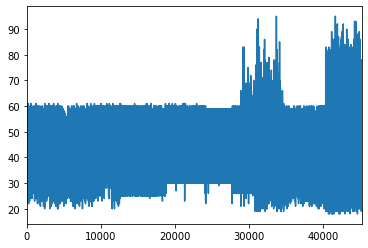

In [157]:
%matplotlib inline
bd["age"].plot()

In [ ]:
!pip install seaborn

In [158]:
import seaborn as sns

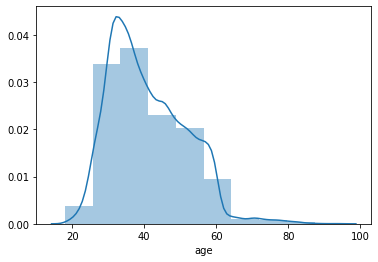

In [160]:
#density plot
sns.distplot(bd['age'], bins=10, kde=True) #histogram and density curve
# see what various values to these options do

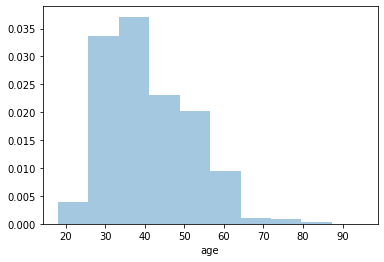

In [161]:
sns.distplot(bd['age'],kde=False,bins=10,hist=True, norm_hist=True)

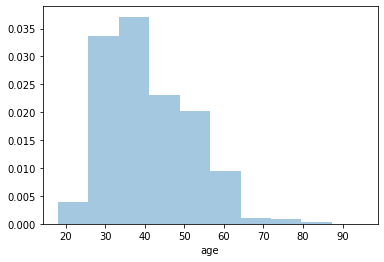

In [162]:
myplot=sns.distplot(bd['age'],kde=False,norm_hist=True,bins=10,hist=True)
myimg=myplot.get_figure()
myimg.savefig('data/output.png')

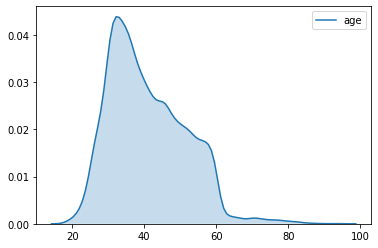

In [163]:
#sns.kdeplot(bd['pdays'],shade=True)
sns.kdeplot(bd['age'],shade=True)

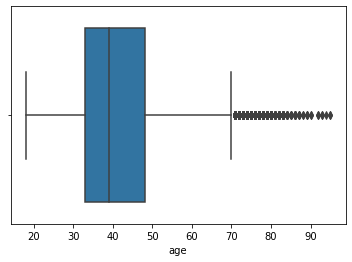

In [164]:
sns.boxplot(bd['age'])

### numeric-numeric

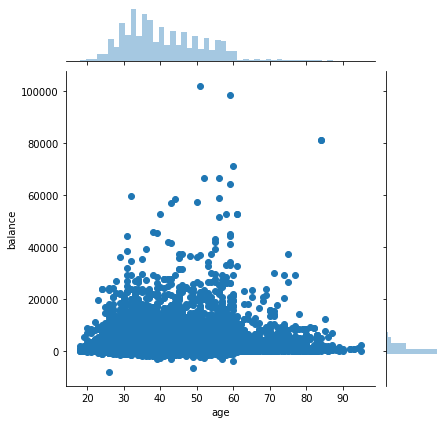

In [165]:
sns.jointplot(x="age", y="balance", data=bd)

In [ ]:
sns.jointplot(x="age", y="balance", data=bd.iloc[:100,:],
              kind="hex",size=10,color="g")

In [ ]:
#linear model plot
sns.lmplot(x='duration', y='campaign', 
           data=bd.iloc[1:500,:],
          hue="housing",
          col="default")

### Categorical

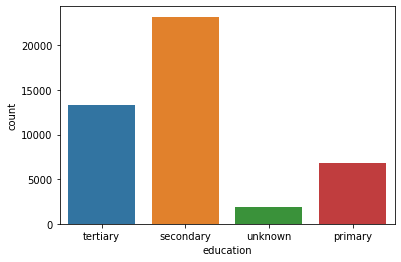

In [166]:
sns.countplot(x="education", data=bd)

### Heatmaps

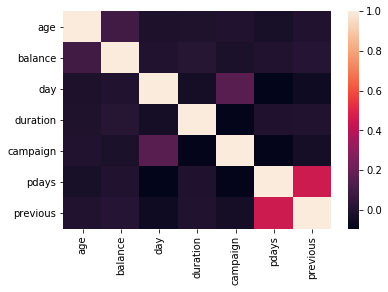

In [167]:
sns.heatmap(bd.corr())